In [22]:
import matplotlib.pyplot as plt
import torch

import wandb
import wandb_util
from pipeline.train import load_dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# download datasets
api = wandb.Api()
dataset_single_art = api.artifact(f'romeu/{wandb_util.PROJECT_NAME}/collins-single-macro:latest')
dataset_multi_art = api.artifact(f'romeu/{wandb_util.PROJECT_NAME}/collins-multi-macro:latest')
dataset_focused_art = api.artifact(f'romeu/{wandb_util.PROJECT_NAME}/collins-focused-macro:latest')

In [44]:
dataset_single = load_dataset(dataset_single_art)
dataset_multi = load_dataset(dataset_multi_art)
dataset_focused = load_dataset(dataset_focused_art)

wandb:   3 of 3 files downloaded.  


wandb:   3 of 3 files downloaded.  


wandb:   3 of 3 files downloaded.  


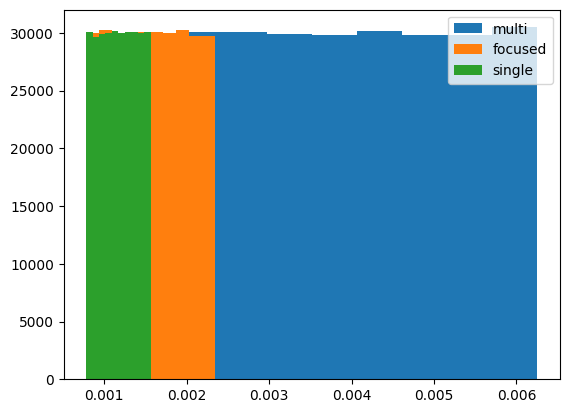

In [53]:
def dataset_scales(dataset):
    covs = dataset.covs
    scales = torch.sqrt(torch.diagonal(covs, dim1=2, dim2=1)[:, 0])
    return scales

scales_single = dataset_scales(dataset_single)
scales_multi = dataset_scales(dataset_multi)
scales_focused = dataset_scales(dataset_focused)

plt.hist(scales_multi, label='multi')
plt.hist(scales_focused, label='focused')
plt.hist(scales_single, label='single')
plt.legend()

In [52]:
from model_evaluation import res_to_scale

res_to_scale(512, slope=0.3, intercept=0)
# res_to_scale(512)

0.0005859375